In [1]:
# Import necessary libraries
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# os.chdir('/Users/gowtham/Documents/python/SCB/airflow/airflow_docker/')

In [3]:
# Extract the images

images_ = []
labels_ = []

dataset_path = '/Users/gowtham/Documents/python/SCB/airflow/airflow_docker/data'
df = pd.DataFrame(columns=["file_name", "class", "image"])

try:
    # image_size = input("Enter the resizing width and height of the image(e.g., 128, 128): ")
    # # Validate user input for image size
    # image_size = eval(image_size)

    for labels in os.listdir(dataset_path + '/plant_images'):
        if labels != ".DS_Store":
            print(f"Processing class: {labels}")
            class_path = os.path.join(dataset_path + '/plant_images', labels)

            for img in os.listdir(class_path):
                image_path = os.path.join(class_path, img)
                image = cv2.imread(image_path)

                # Resize the image using OpenCV's resize function
                # resized_image = cv2.resize(image, image_size)

                # Temporary list to store data for each image
                image_data = {"file_name": img, "class": labels, "image": image}

                # Append data using pd.concat (recommended approach)
                df = pd.concat([df, pd.DataFrame.from_dict([image_data])], ignore_index=True)

except ValueError:
    print("Invalid input. Please enter image size as width,height (e.g., 128, 128).")
    exit()

# After processing all images, consider saving the DataFrame
if len(df) > 0:
    df.to_csv(dataset_path + "/preprocess_1/plant_image_data.csv", index=False)  # Save DataFrame as CSV


Processing class: potato_early_blight
Processing class: corn_maize_common_rust
Processing class: tomato_bacterial_spot


In [4]:
df.sample(10)

,file_name,class,image
594,RS_Rust 2728.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
536,RS_Rust 2739.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
852,e85d64bf-a47c-4d80-8eb8-9059c1eec9a9___GCREC_B...,tomato_bacterial_spot,"[[[149, 149, 155], [139, 139, 145], [153, 153,..."
243,be89d35f-e382-4b1c-95e8-af88d969d306___RS_Earl...,potato_early_blight,"[[[149, 126, 124], [156, 133, 131], [164, 141,..."
447,RS_Rust 2635.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
604,f47f66f7-19c1-46d2-8dd1-24ad16f0b670___UF.GRC_...,tomato_bacterial_spot,"[[[136, 140, 135], [131, 135, 130], [126, 130,..."
652,fbcddd00-575a-4569-9e41-5a73dda710f9___GCREC_B...,tomato_bacterial_spot,"[[[95, 94, 110], [103, 102, 118], [89, 88, 104..."
133,c7f27f40-6634-4118-9990-6897e0c68579___RS_Earl...,potato_early_blight,"[[[132, 121, 124], [130, 119, 122], [161, 150,..."
729,f968f18e-bc41-40bd-b838-f535be8afb93___GCREC_B...,tomato_bacterial_spot,"[[[99, 100, 114], [100, 101, 115], [103, 104, ..."
55,c53d85d7-bddb-422b-955c-6842cce9a927___RS_Earl...,potato_early_blight,"[[[175, 161, 163], [159, 145, 147], [171, 157,..."


In [5]:
df['file_name'].nunique

<bound method IndexOpsMixin.nunique of 0      bc7552e4-3901-41b8-8bef-727eeca4270e___RS_Earl...
1      d8a8d6e5-d82d-4f7c-aac5-183e85549d9b___RS_Earl...
2      d84ba2ee-6ef5-45b7-a15a-b677b99cd3f6___RS_Earl...
3      f164ce92-d109-47ca-9f75-380a7f16155a___RS_Earl...
4      faac446b-34ac-414a-9f0e-148d6ee87bfa___RS_Earl...
                             ...                        
895    f9299ed5-ac75-4849-a8b0-1e1b6c9d3097___GCREC_B...
896    e77c7af3-35cb-496d-bc8b-34bc2344b8fc___GCREC_B...
897    e2941eab-3c1c-43a2-aa6d-5f3926da0568___GCREC_B...
898    ea4ddb4b-216a-4ec2-85bc-06314c7de145___GCREC_B...
899    fc48610a-675f-4fdf-998d-5d877c909550___GCREC_B...
Name: file_name, Length: 900, dtype: object>

In [6]:
df1 = df[['file_name', 'class']]
df1.head()

,file_name,class
0,bc7552e4-3901-41b8-8bef-727eeca4270e___RS_Earl...,potato_early_blight
1,d8a8d6e5-d82d-4f7c-aac5-183e85549d9b___RS_Earl...,potato_early_blight
2,d84ba2ee-6ef5-45b7-a15a-b677b99cd3f6___RS_Earl...,potato_early_blight
3,f164ce92-d109-47ca-9f75-380a7f16155a___RS_Earl...,potato_early_blight
4,faac446b-34ac-414a-9f0e-148d6ee87bfa___RS_Earl...,potato_early_blight


In [7]:
df2 = df[['file_name', 'image']]
df2.head()

,file_name,image
0,bc7552e4-3901-41b8-8bef-727eeca4270e___RS_Earl...,"[[[190, 177, 179], [194, 181, 183], [196, 183,..."
1,d8a8d6e5-d82d-4f7c-aac5-183e85549d9b___RS_Earl...,"[[[145, 138, 141], [163, 156, 159], [160, 153,..."
2,d84ba2ee-6ef5-45b7-a15a-b677b99cd3f6___RS_Earl...,"[[[185, 167, 166], [186, 168, 167], [191, 173,..."
3,f164ce92-d109-47ca-9f75-380a7f16155a___RS_Earl...,"[[[201, 189, 189], [208, 196, 196], [214, 202,..."
4,faac446b-34ac-414a-9f0e-148d6ee87bfa___RS_Earl...,"[[[180, 162, 163], [179, 161, 162], [178, 160,..."


In [8]:
df = pd.merge(df1, df2, on='file_name')
df.sample(10)

,file_name,class,image
210,d0221e13-4d76-45e5-9cd1-7cac63833f52___RS_Earl...,potato_early_blight,"[[[139, 125, 129], [135, 121, 125], [133, 119,..."
475,RS_Rust 2570.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
561,RS_Rust 2470.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
633,f880355a-9e96-41a3-9e66-79d498dc6d61___GCREC_B...,tomato_bacterial_spot,"[[[147, 145, 157], [144, 142, 154], [147, 145,..."
171,fba7a41d-25df-4a1c-93d1-98d62e3376e0___RS_Earl...,potato_early_blight,"[[[179, 165, 169], [182, 168, 172], [180, 166,..."
186,beb20b26-07f9-4215-8264-dca1283514ac___RS_Earl...,potato_early_blight,"[[[212, 206, 207], [213, 207, 208], [213, 207,..."
346,RS_Rust 2479.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
83,db5d0f5f-a722-4f12-96bf-c9608e5c7f2a___RS_Earl...,potato_early_blight,"[[[143, 126, 129], [164, 147, 150], [126, 109,..."
489,RS_Rust 2567.JPG,corn_maize_common_rust,"[[[7, 0, 0], [7, 0, 0], [7, 0, 0], [5, 0, 0], ..."
833,e941c8ba-5fce-481c-aba5-4b272c5a0be6___GCREC_B...,tomato_bacterial_spot,"[[[145, 143, 149], [151, 149, 155], [153, 151,..."


In [9]:
len(df)

900

In [10]:
df.isnull().sum()

file_name    0
class        0
image        0
dtype: int64

In [11]:
for col in df.columns:
    if df[col].isnull().any():
        print(f"Feature: {col} has null values")


In [12]:
# No missing values
# Vizualizing the images

def sample_img(df_val,n):
    df_val = df_val.sample(n)
    plt.figure(figsize=(20,20))
    for i,j in enumerate(df_val.iterrows()):
        plt.subplot(1,n,i+1)
        plt.imshow(j[1]['image'])
        plt.title("{}".format(j[1]['class'])) 

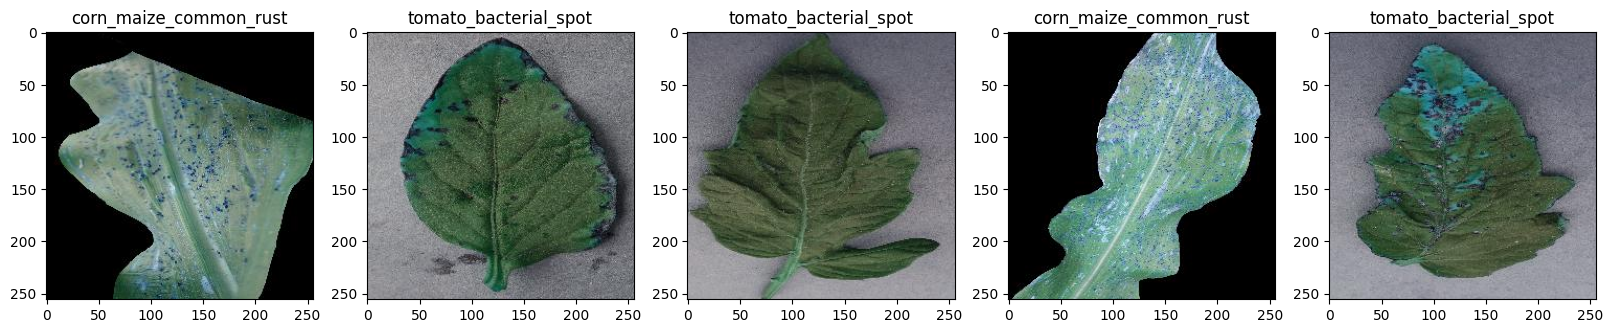

In [13]:
sample_img(df, 5)

In [14]:
# splitting dataset to train and test
from sklearn.model_selection import StratifiedShuffleSplit

# Define the class label column name (replace with your actual column name)
class_label = "class"

# Create a StratifiedShuffleSplit object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)  # Adjust test_size as needed

# Split the data into train and test sets (assuming your data is in a pandas DataFrame called df)
for train_index, test_index in sss.split(df, df[class_label]):
    train_dataset = df.iloc[train_index]
    test_dataset = df.iloc[test_index]

In [15]:
# Resizing the image suitable for model use
len(train_dataset)

720

In [16]:
# Reshaping train dataset suitable for the model
# For reshaping the image, we can do it if it is in the form of an array or liost

import cv2

image_list = []
resized_image_size = (128, 128)     # The image size can be dependent on the model
image = train_dataset['image']
label = train_dataset['class']

for i, j in enumerate(image):
    img = cv2.resize(j, resized_image_size)      
    image_list.append(img)

In [17]:
len(image_list)

720

In [18]:
# OpenCV reads images in BGR format by default when using cv2.imread()
# Few libraries like matplotlib and PIL expects image in 
image_rgb = []
for img in image_list:
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image_rgb.append(image)

In [19]:
len(image_rgb)

720

In [20]:
# Normalization

# converting the list to array
image_array = np.array(image_rgb)
image_norm = (image_array/255).astype('float32')

print(image_norm.shape)
print(image_norm.max(), image_norm.min())


(720, 128, 128, 3)
1.0 0.0


In [21]:
image_norm.shape

(720, 128, 128, 3)

In [22]:
image_flatten = image_norm.reshape(image_norm.shape[0], -1)
image_flatten.shape

(720, 49152)

In [23]:
type(image_flatten.shape[0])

int

In [24]:
image_reshape = image_flatten.reshape(image_flatten.shape[0], 128, 128, 3)
image_reshape.shape

(720, 128, 128, 3)

In [29]:
df_norm = pd.DataFrame(image_flatten)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,0.615686,0.576471,0.568627,0.639216,0.600000,0.592157,0.623529,0.584314,0.576471,0.607843,...,0.419608,0.470588,0.423529,0.423529,0.454902,0.407843,0.407843,0.454902,0.407843,0.407843
1,0.772549,0.764706,0.784314,0.780392,0.772549,0.792157,0.768627,0.760784,0.780392,0.780392,...,0.600000,0.572549,0.529412,0.545098,0.600000,0.556863,0.572549,0.576471,0.533333,0.549020
2,0.639216,0.611765,0.643137,0.650980,0.623529,0.654902,0.643137,0.615686,0.647059,0.627451,...,0.498039,0.517647,0.470588,0.486275,0.505882,0.458824,0.474510,0.505882,0.458824,0.474510
3,0.470588,0.462745,0.505882,0.454902,0.447059,0.490196,0.462745,0.454902,0.498039,0.458824,...,0.749020,0.698039,0.694118,0.749020,0.682353,0.678431,0.733333,0.678431,0.674510,0.729412
4,0.584314,0.541176,0.572549,0.690196,0.647059,0.678431,0.666667,0.623529,0.654902,0.647059,...,0.768627,0.741176,0.717647,0.733333,0.760784,0.737255,0.752941,0.764706,0.741176,0.756863


In [30]:
df_label = pd.DataFrame(label, columns=['class'])
df_label.head()

,class
662,tomato_bacterial_spot
244,potato_early_blight
672,tomato_bacterial_spot
156,potato_early_blight
168,potato_early_blight


In [37]:
len(df_label)

720

In [34]:
df_preprocess_ = df_norm.join(df_label)

In [36]:
df_preprocess_.head()

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,class
0,0.615686,0.576471,0.568627,0.639216,0.600000,0.592157,0.623529,0.584314,0.576471,0.607843,...,0.470588,0.423529,0.423529,0.454902,0.407843,0.407843,0.454902,0.407843,0.407843,potato_early_blight
1,0.772549,0.764706,0.784314,0.780392,0.772549,0.792157,0.768627,0.760784,0.780392,0.780392,...,0.572549,0.529412,0.545098,0.600000,0.556863,0.572549,0.576471,0.533333,0.549020,potato_early_blight
2,0.639216,0.611765,0.643137,0.650980,0.623529,0.654902,0.643137,0.615686,0.647059,0.627451,...,0.517647,0.470588,0.486275,0.505882,0.458824,0.474510,0.505882,0.458824,0.474510,potato_early_blight
3,0.470588,0.462745,0.505882,0.454902,0.447059,0.490196,0.462745,0.454902,0.498039,0.458824,...,0.698039,0.694118,0.749020,0.682353,0.678431,0.733333,0.678431,0.674510,0.729412,NaN
4,0.584314,0.541176,0.572549,0.690196,0.647059,0.678431,0.666667,0.623529,0.654902,0.647059,...,0.741176,0.717647,0.733333,0.760784,0.737255,0.752941,0.764706,0.741176,0.756863,potato_early_blight


In [46]:
# Standardization

mean = np.mean(image_array, axis=(0,1,2), keepdims=True)
std = np.std(image_array, axis=(0,1,2), keepdims=True)
image_std = (image_array - mean) / std

print(image_std.shape)
print(image_std.max(), image_std.min())

(720, 128, 128, 3)
2.95130366251421 -2.027456239178381


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5808326040662353..1.1950334461731027].


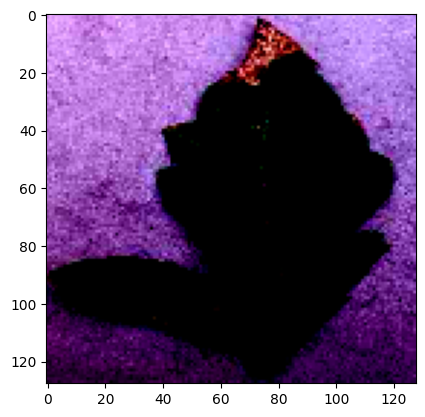

In [47]:
# Plotting a sample image befor cropping

image_to_plot = image_std[0]
plt.imshow(image_to_plot)
plt.show()


720


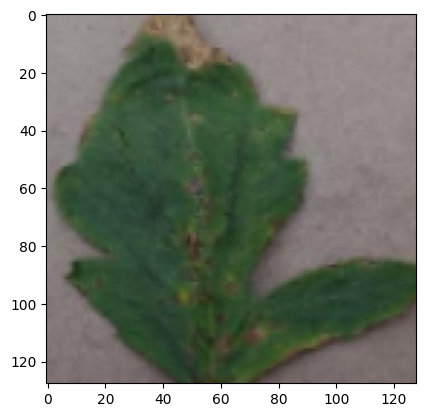

In [50]:
import imgaug as ia
from imgaug import augmenters as iaa

# Define augmentation sequence (replace with your desired transformations)
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Flip horizontally with 50% probability
    iaa.Rotate((-10, 10)),  # Rotate between -10 and 10 degrees
    iaa.Crop(percent=(0.0, 0.1))  # Randomly crop up to 10% of the image
])

# Load your image array (assuming your array is called "images")
original_images = image_array

# Augment the images
augmented_images = seq(images=original_images)
print(len(augmented_images))
img_to_plot = augmented_images[0]
plt.imshow(img_to_plot)
plt.show()


# Save the augmented images (replace "augmented_images.npy" with your desired filename)
# np.save("augmented_images.npy", augmented_images)


In [ ]:
# Define augmentation sequence (replace with your desired transformations)
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Flip horizontally with 50% probability
    iaa.Rotate((-10, 10)),  # Rotate between -10 and 10 degrees
    iaa.Crop(percent=(0.0, 0.1))  # Randomly crop up to 10% of the image
])

# Load your image array (assuming your array is called "images") and labels (assuming in a list called "labels")
original_images = images
original_labels = labels

# Augment the images
augmented_images = seq(images=original_images)

# Append augmented images and labels to originals (assuming labels have the same order as images)
augmented_images = np.concatenate((original_images, augmented_images))
augmented_labels = labels + labels.copy()  # Duplicate labels for augmented images

# Save the augmented data (replace with your desired filenames)
np.save("augmented_images.npy", augmented_images)
np.save("augmented_labels.npy", augmented_labels)


In [ ]:
# Augmentation: Rotation, Translation, Shearing, Zooming, Flipping, Cropping, Color Jittering
# Using Augmentor library or similar
import Augmentor

p = Augmentor.Pipeline()
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.zoom_random(probability=0.5, percentage_area=0.8)
p.flip_left_right(probability=0.5)
p.sample(1)

In [ ]:
# Download data from MinIO
downloaded_bytes = client.get_object(bucket_name, object_name).read()

# Convert bytes back to NumPy array
retrieved_array = np.frombuffer(downloaded_bytes, dtype=your_original_array_dtype)  # Replace with actual dtype
